In [251]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(1000)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [252]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()

In [253]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [254]:
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]

In [255]:
from sklearn.model_selection import train_test_split
X, y = df_iris.iloc[:,0:4], df_iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0,stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
cov_mat = np.cov(X_train_scaled.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [256]:
#Choosing how many features will be enough
total = sum(eigen_values)
var_explained= [(eig_val/total) for eig_val in sorted(eigen_values, reverse=True)]
np.array(var_explained)*100

array([72.45460123, 23.64251479,  3.42287417,  0.4800098 ])

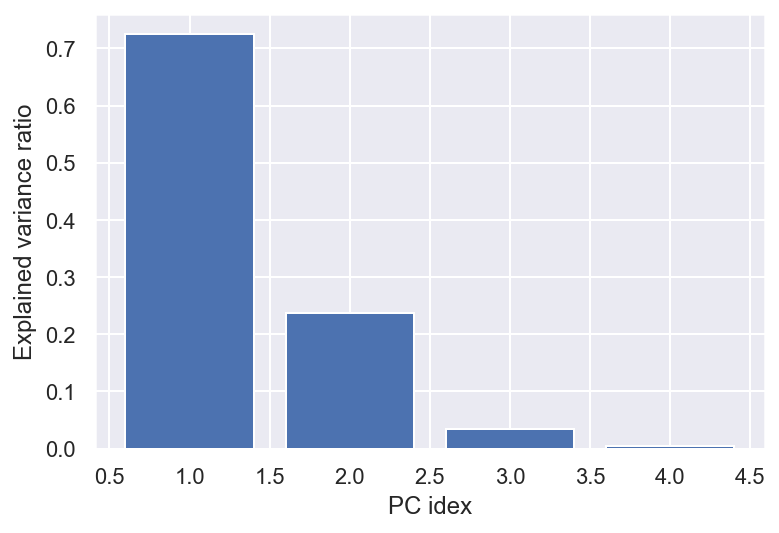

In [257]:
plt.bar(range(1,5), var_explained, alpha=1, align='center')
#plt.step(range(1,5), cum_var_exp, where='mid')
plt.xlabel('PC idex')
plt.ylabel('Explained variance ratio')
#plt.legend('best')
plt.show()

In [258]:
sorted_index=pd.Series(eigen_values).sort_values(ascending=False).index
W=eigen_vectors[:, sorted_index[:2]]
X_train_pca = X_train_scaled.dot(W)
X_test_pca = X_test_scaled.dot(W)
y_train.unique()

array([2, 0, 1])

[]

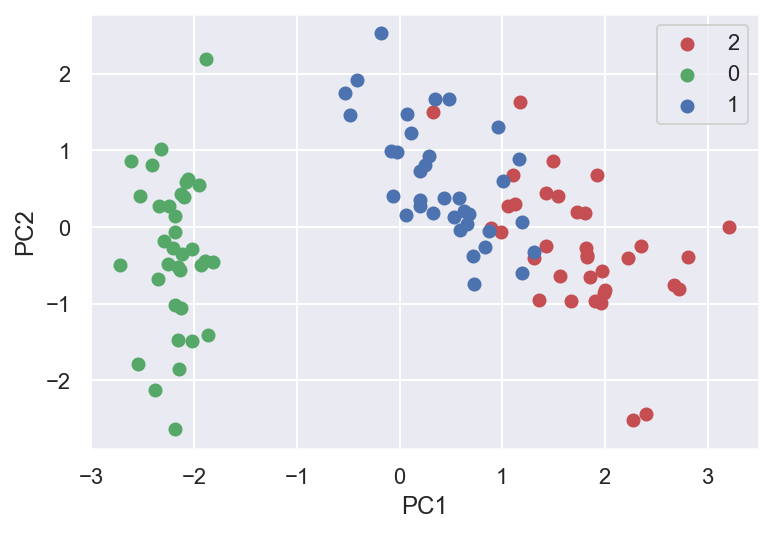

In [259]:
colors = ['r','g','b']
for label, color in zip(y_train.unique(), colors):
    plt.scatter(X_train_pca[y_train==label,0],
                X_train_pca[y_train==label, 1], c=color, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right')
plt.plot()

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
logmodel = LogisticRegression()
logmodel.fit(X_train_pca,y_train)

LogisticRegression()

In [262]:
predictions = logmodel.predict(X_test_pca)

In [263]:
from sklearn.metrics import accuracy_score
score_p = accuracy_score(y_test,predictions)
print('Accuracy:',(score_p*100).round(),'%')

Accuracy: 91.0 %


## Part 2

In [264]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [265]:
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
predictions = logmodel.predict(X_test)
score_l = accuracy_score(y_test,predictions)
print('Accuracy:',score_l.round(3)*100,'%')

Accuracy: 97.8 %
